# Building!

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.integrate import odeint # type: ignore
from neuron_model import NeuronModel

### Saddle Node Neuron

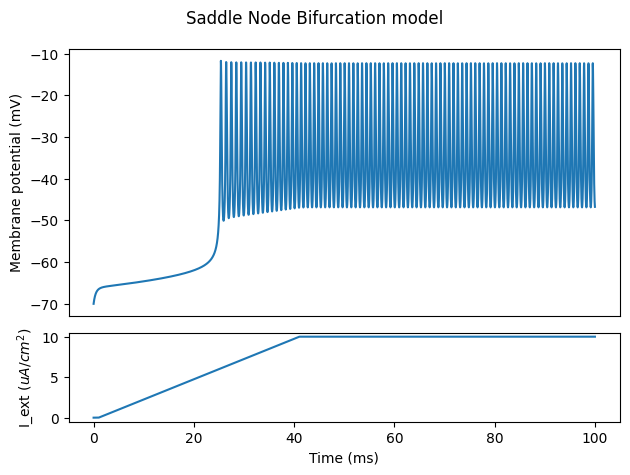

c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:267: RuntimeWarning: divide by zero encountered in divide
  return (I_ext - self.I_Na(V) - self.I_L(V)) / (self.g_K * (V - self.E_K))
c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:81: RuntimeWarning: overflow encountered in scalar multiply
  return self.g_K * n * (V - self.E_K)
c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:258: RuntimeWarning: overflow encountered in scalar divide
  dndt = (self.n_inf(V) - n) / self.tau_n(V)
c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:594: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_pos = odeint(dALLdt_backward, points_pos, t, args=(lambda t: I_ext,))
c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:595: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_

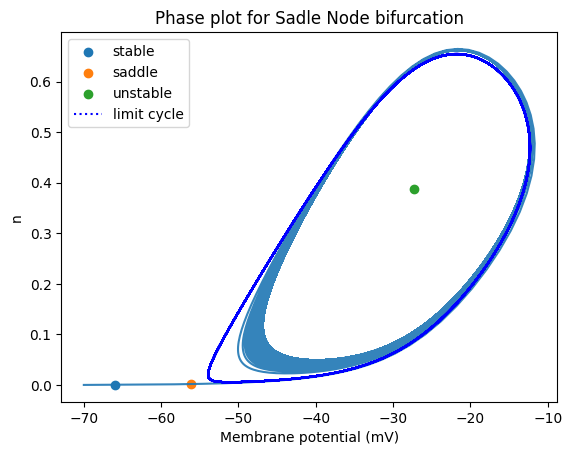

In [ ]:
saddle_node = NeuronModel('saddle_node')
dt = 0.01   
T = 100
t = np.arange(0, T, dt)
I_step = saddle_node.create_step_current(t, 1, 80, 0, 5)
I_ramp = saddle_node.create_ramp_current(t, 1, 40, 0, 10)
I_ext = I_ramp
a = saddle_node.simulate(T, dt, [-70, 0], I_ext)    

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle("Saddle Node Bifurcation model")
axs[0].plot(a[0], a[1][:, 0])
axs[0].set_xticks([])
axs[0].set_ylabel("Membrane potential (mV)")
axs[1].plot(a[0], I_ext)
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("I_ext ($uA/cm^2$)")
plt.tight_layout()
plt.show()

equlibria = saddle_node.find_equlibrium_points(0, [-90, 20])
seperatrix = saddle_node.find_separatrix(1) # all other values are default
limit_cycle = saddle_node.find_limit_cycle(1)

plt.plot(a[1][:, 0], a[1][:, 1], alpha = 0.9)
for i in range(len(equlibria)): 
    plt.scatter(equlibria[i]['point'][0], equlibria[i]['point'][1], label = equlibria[i]['stability'])
# plt.plot(seperatrix[0], seperatrix[1], color='green', label='seperatrix')
plt.plot(limit_cycle[0], limit_cycle[1], color='blue', label='limit cycle', linestyle=':')
plt.title("Phase plot for Sadle Node bifurcation") 
plt.xlabel("Membrane potential (mV)")   
plt.ylabel("n") 
plt.legend()
plt.show()

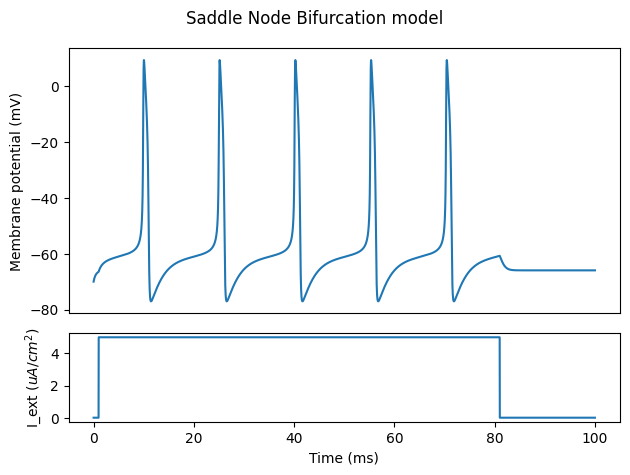

c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:63: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(V - self.V_mid_n) / self.k_n))
c:\Users\Dell\Documents\GitHub\Neuronal-Dynamics\neuron_model.py:58: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(V - self.V_mid_m) / self.k_m))


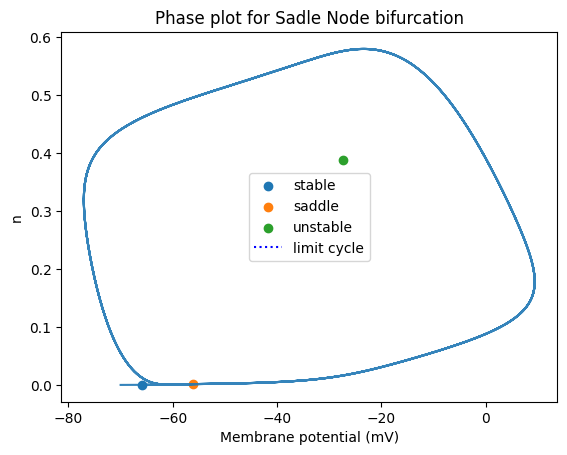

In [3]:
snic = NeuronModel('SNIC')
dt = 0.01   
T = 100
t = np.arange(0, T, dt)
I_step = snic.create_step_current(t, 1, 80, 0, 5)
I_ramp = snic.create_ramp_current(t, 1, 40, 0, 10)
I_ext = I_step
a = snic.simulate(T, dt, [-70, 0], I_ext)    

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle("Saddle Node Bifurcation model")
axs[0].plot(a[0], a[1][:, 0])
axs[0].set_xticks([])
axs[0].set_ylabel("Membrane potential (mV)")
axs[1].plot(a[0], I_ext)
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("I_ext ($uA/cm^2$)")
plt.tight_layout()
plt.show()

equlibria = snic.find_equlibrium_points(0, [-90, 20])
seperatrix = snic.find_separatrix(1) # all other values are default
limit_cycle = snic.find_limit_cycle(1)

plt.plot(a[1][:, 0], a[1][:, 1], alpha = 0.9)
for i in range(len(equlibria)): 
    plt.scatter(equlibria[i]['point'][0], equlibria[i]['point'][1], label = equlibria[i]['stability'])
# plt.plot(seperatrix[0], seperatrix[1], color='green', label='seperatrix')
plt.plot(limit_cycle[0], limit_cycle[1], color='blue', label='limit cycle', linestyle=':')
plt.title("Phase plot for Sadle Node bifurcation") 
plt.xlabel("Membrane potential (mV)")   
plt.ylabel("n") 
plt.legend()
plt.show()

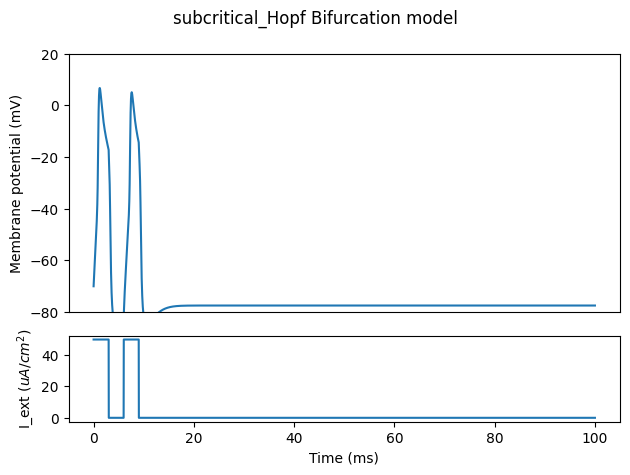

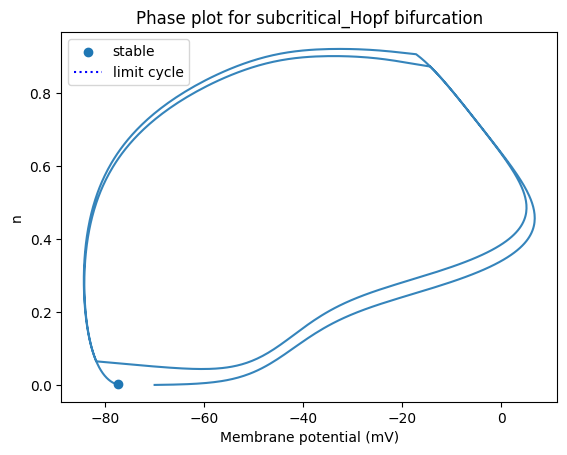

In [4]:
sub_hop = NeuronModel('subcritical_Hopf')
dt = 0.01   
T = 100
t = np.arange(0, T, dt)
I_step = sub_hop.create_step_current(t, 1, 80, 0, 5)
I_ramp = sub_hop.create_ramp_current(t, 1, 40, 0, 10)
pulse_times = [0, 6] #[0, 10, 30, 40, 50, 60, 70, 80, 90]  
I_pulse = sub_hop.create_pulse_train(t, pulse_times, 3, 0, 50)
I_ext = I_pulse
a = sub_hop.simulate(T, dt, [-70, 0], I_ext)    

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle("subcritical_Hopf Bifurcation model")
axs[0].plot(a[0], a[1][:, 0])
axs[0].set_xticks([])
axs[0].set_ylabel("Membrane potential (mV)")
axs[0].set_ylim([-80, 20])  
axs[1].plot(a[0], I_ext(np.arange(0, T, dt)))   
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("I_ext ($uA/cm^2$)")
plt.tight_layout()
plt.show()

equlibria = sub_hop.find_equlibrium_points(0, [-90, 20])
# seperatrix = sub_hop.find_separatrix(1) # all other values are default
limit_cycle = sub_hop.find_limit_cycle(1)

plt.plot(a[1][:, 0], a[1][:, 1], alpha = 0.9)
for i in range(len(equlibria)): 
    plt.scatter(equlibria[i]['point'][0], equlibria[i]['point'][1], label = equlibria[i]['stability'])
# plt.plot(seperatrix[0], seperatrix[1], color='green', label='seperatrix')
plt.plot(limit_cycle[0], limit_cycle[1], color='blue', label='limit cycle', linestyle=':')
plt.title("Phase plot for subcritical_Hopf bifurcation") 
plt.xlabel("Membrane potential (mV)")   
plt.ylabel("n") 
plt.legend()
plt.show()

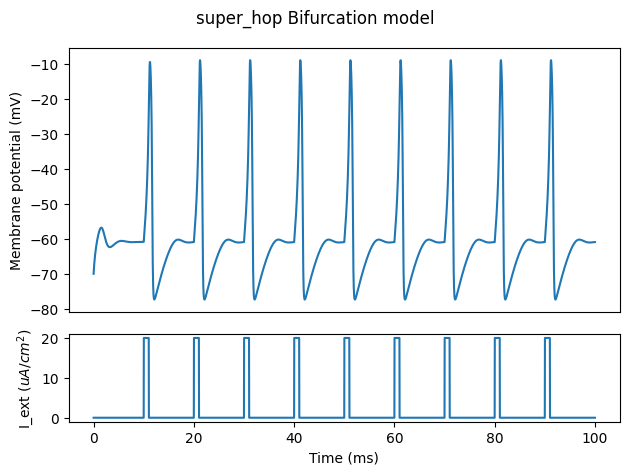

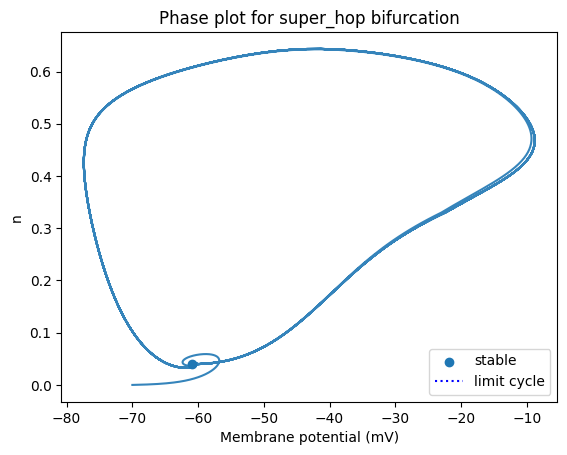

In [5]:
super_hop = NeuronModel('supercritical_Hopf')
dt = 0.01   
T = 100
t = np.arange(0, T, dt)
I_step = super_hop.create_step_current(t, 1, 80, 0, 5)
I_ramp = super_hop.create_ramp_current(t, 1, 40, 0, 10)
pulse_times = [10, 20, 30, 40, 50, 60, 70, 80, 90]  
I_pulse = super_hop.create_pulse_train(t, pulse_times, 1, 0, 20)
I_ext = I_pulse
a = super_hop.simulate(T, dt, [-70, 0], I_ext)    

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle("super_hop Bifurcation model")
axs[0].plot(a[0], a[1][:, 0])
axs[0].set_xticks([])
axs[0].set_ylabel("Membrane potential (mV)")
axs[1].plot(a[0], I_ext(np.arange(0, T, dt)))
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("I_ext ($uA/cm^2$)")
plt.tight_layout()
plt.show()

equlibria = super_hop.find_equlibrium_points(0, [-90, 20])
# seperatrix = super_hop.find_separatrix(1) # all other values are default
limit_cycle = super_hop.find_limit_cycle(1)

plt.plot(a[1][:, 0], a[1][:, 1], alpha = 0.9)
for i in range(len(equlibria)): 
    plt.scatter(equlibria[i]['point'][0], equlibria[i]['point'][1], label = equlibria[i]['stability'])
# plt.plot(seperatrix[0], seperatrix[1], color='green', label='seperatrix')
plt.plot(limit_cycle[0], limit_cycle[1], color='blue', label='limit cycle', linestyle=':')
plt.title("Phase plot for super_hop bifurcation") 
plt.xlabel("Membrane potential (mV)")   
plt.ylabel("n") 
plt.legend()
plt.show()

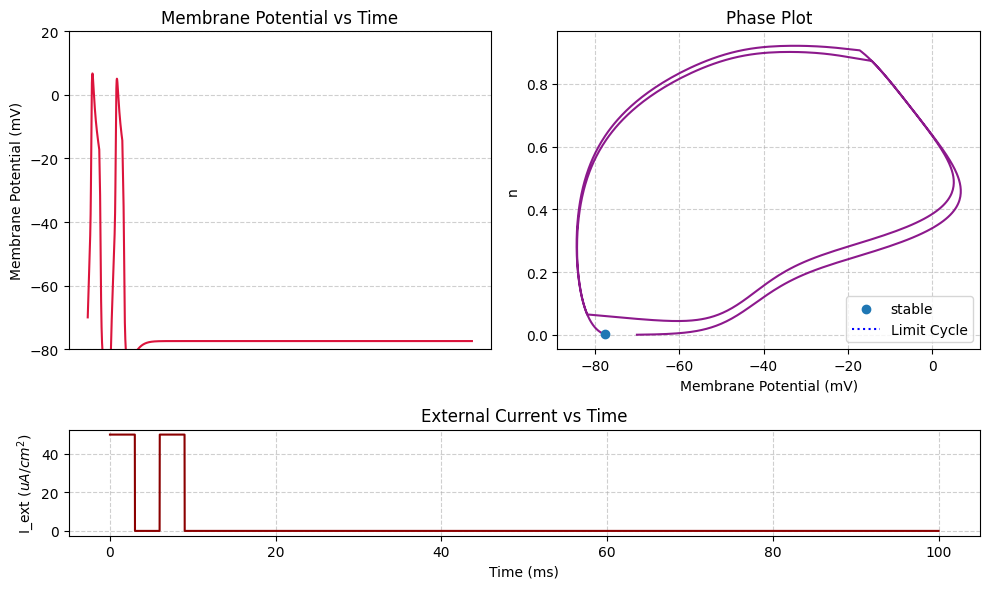

In [8]:
import matplotlib.gridspec as gridspec

# Simulating neuron dynamics
sub_hop = NeuronModel('subcritical_Hopf')
dt = 0.01   
T = 100
t = np.arange(0, T, dt)

I_step = sub_hop.create_step_current(t, 1, 80, 0, 5)
I_ramp = sub_hop.create_ramp_current(t, 1, 40, 0, 10)
pulse_times = [0, 6]  
I_pulse = sub_hop.create_pulse_train(t, pulse_times, 3, 0, 50)
I_ext = I_pulse
a = sub_hop.simulate(T, dt, [-70, 0], I_ext)    

# Equilibria and limit cycle
equilibria = sub_hop.find_equlibrium_points(0, [-90, 20])
limit_cycle = sub_hop.find_limit_cycle(1)

# --- Create Figure ---
fig = plt.figure(figsize=(10, 6))  # Adjust size
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[1, 1])  # Custom grid

# --- Left Panel (Membrane Potential vs Time) ---
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(a[0], a[1][:, 0], color='crimson')
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xticks([])
ax1.set_ylim([-80, 20])
ax1.set_title("Membrane Potential vs Time")
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Right Panel (Phase Space Plot) ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(a[1][:, 0], a[1][:, 1], alpha=0.9, color='purple')
for eq in equilibria:
    ax2.scatter(eq['point'][0], eq['point'][1], label=eq['stability'], zorder=3)
ax2.plot(limit_cycle[0], limit_cycle[1], color='blue', linestyle=':', label='Limit Cycle')
ax2.set_xlabel("Membrane Potential (mV)")
ax2.set_ylabel("n")
ax2.set_title("Phase Plot")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.6)

# --- Bottom Panel (Current vs Time) ---
ax3 = fig.add_subplot(gs[1, :])  # Takes full width
ax3.plot(a[0], I_ext(np.arange(0, T, dt)), color='darkred')
ax3.set_xlabel("Time (ms)")
ax3.set_ylabel("I_ext ($uA/cm^2$)")
ax3.set_title("External Current vs Time")
ax3.grid(True, linestyle="--", alpha=0.6)

# --- Layout Adjustments ---
plt.tight_layout()
plt.show()